In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("book RS.csv")
df.head()

,Unnamed: 0,User_ID,Book_Title,Book_Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
df.groupby('Book_Title')['Book_Rating'].mean().sort_values(ascending=False).head()

Book_Title
Dr Mommy (From Here To Maternity) (Silhouette Desire, 1269)                                                           10.0
The Piano Man's Daughter                                                                                              10.0
Private Screening                                                                                                     10.0
The Pilates Body: The Ultimate At-Home Guide to Strengthening, Lengthening, and Toning Your Body--Without Machines    10.0
Desert Solitaire                                                                                                      10.0
Name: Book_Rating, dtype: float64

In [35]:
df.groupby('Book_Title')['Book_Rating'].count().sort_values(ascending=False).head()

Book_Title
Fahrenheit 451                                   5
Ender's Game (Ender Wiggins Saga (Paperback))    4
Stardust                                         4
Vanished                                         4
Charlie and the Chocolate Factory                4
Name: Book_Rating, dtype: int64

In [36]:
ratings = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].mean())
ratings.head()

,Book_Rating
Book_Title,
"Jason, Madison &amp",8.0
Other Stories;Merril;1985;McClelland &amp,6.0
Repairing PC Drives &amp,4.0
'48,7.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0


In [37]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Book_Title')['Book_Rating'].count())
ratings.head()

,Book_Rating,num of ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


<AxesSubplot:>

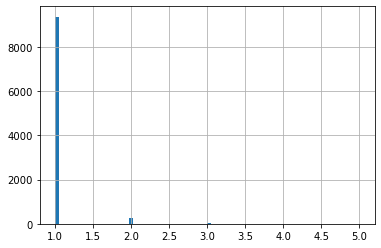

In [38]:
ratings['num of ratings'].hist(bins=70)

### Recommending simmiler books

In [39]:
book_df = df.pivot_table(index='User_ID',columns='Book_Title',values='Book_Rating')
book_df.head()

Book_Title,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,�?�?bermorgen.
User_ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,Book_Rating,num of ratings
Book_Title,,
Fahrenheit 451,7.000000,5
Ender's Game (Ender Wiggins Saga (Paperback)),6.250000,4
Stardust,8.500000,4
Vanished,6.500000,4
Charlie and the Chocolate Factory,6.500000,4
"The Subtle Knife (His Dark Materials, Book 2)",8.750000,4
"The Amber Spyglass (His Dark Materials, Book 3)",8.250000,4
"The Golden Compass (His Dark Materials, Book 1)",8.333333,3
Pet Sematary,7.666667,3


In [47]:
ratings.head()

,Book_Rating,num of ratings
Book_Title,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1


In [15]:
Fahrenheit_user_ratings = book_df['Fahrenheit 451']
Stardust_user_ratings = book_df['Stardust']
Fahrenheit_user_ratings.head()
Stardust_user_ratings.head()

User_ID
8    NaN
9    NaN
10   NaN
12   NaN
14   NaN
Name: Stardust, dtype: float64

In [41]:
similar_to_Fahrenheit = book_df.corrwith(Fahrenheit_user_ratings)

C:\Users\SARTHAK\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\SARTHAK\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [42]:
corr_Fahrenheit = pd.DataFrame(similar_to_Fahrenheit, columns=['Correlation'])
corr_Fahrenheit.dropna(inplace=True)
corr_Fahrenheit.head()

,Correlation
Book_Title,
Fahrenheit 451,1.0


In [19]:
#依照最相關開始排列
corr_Fahrenheit.sort_values('Correlation',ascending=False).head()

,Correlation
Book_Title,
Fahrenheit 451,1.0


In [20]:
#除了與star wats的相關度，也加上其他電影的評價數，有些電影評價可能只有非常少數
corr_Fahrenheit = corr_Fahrenheit.join(ratings['num of ratings'])
corr_Fahrenheit.head()

,Correlation,num of ratings
Book_Title,,
Fahrenheit 451,1.0,5


In [28]:
#避免太多人看過star wats，但少數電影只有少數人給過評價，而給出錯誤的推薦，因此限定評價超過100個
corr_Fahrenheit[corr_Fahrenheit['num of ratings']>1].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Book_Title,,
Fahrenheit 451,1.0,5


In [29]:
#找出和Liar Liar相關的電影
similar_to_Stardust = book_df.corrwith(Stardust_user_ratings)

C:\Users\SARTHAK\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\SARTHAK\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [33]:
corr_Stardust = pd.DataFrame(similar_to_Stardust,columns=['Correlation'])
corr_Stardust.dropna(inplace=True)
corr_Stardust = corr_Stardust.join(ratings['num of ratings'])
corr_Stardust[corr_Stardust['num of ratings']>1].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
Book_Title,,
Stardust,1.0,4
